In [416]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [417]:
data_set = pd.read_csv('insurance.csv')


In [418]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [419]:
data_set.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [420]:
data_set.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [421]:
data_set.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [422]:
data_set.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [423]:
data_set['sex'].unique()

array(['female', 'male'], dtype=object)

In [424]:
data_set['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [425]:
data_set['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [426]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [427]:
data_set=pd.get_dummies(data=data_set,drop_first=True)

In [428]:
data_set.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:title={'center':'Correlation with Charges'}>

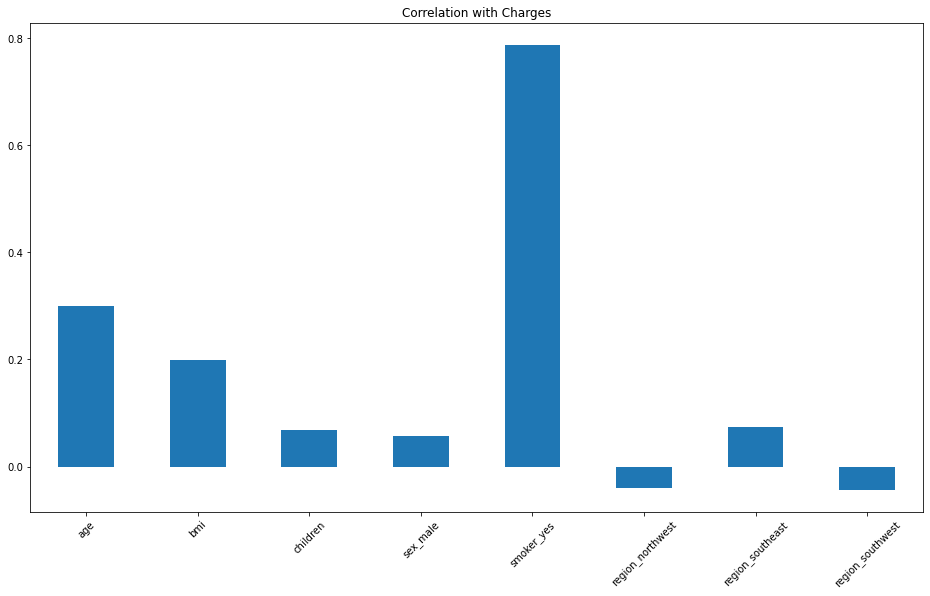

In [429]:
data_set_2=data_set.drop(columns='charges')
data_set_2.corrwith(data_set['charges']).plot.bar(
    figsize=(16,9),title='Correlation with Charges',rot=45
)

In [430]:
corr=data_set.corr()

<AxesSubplot:>

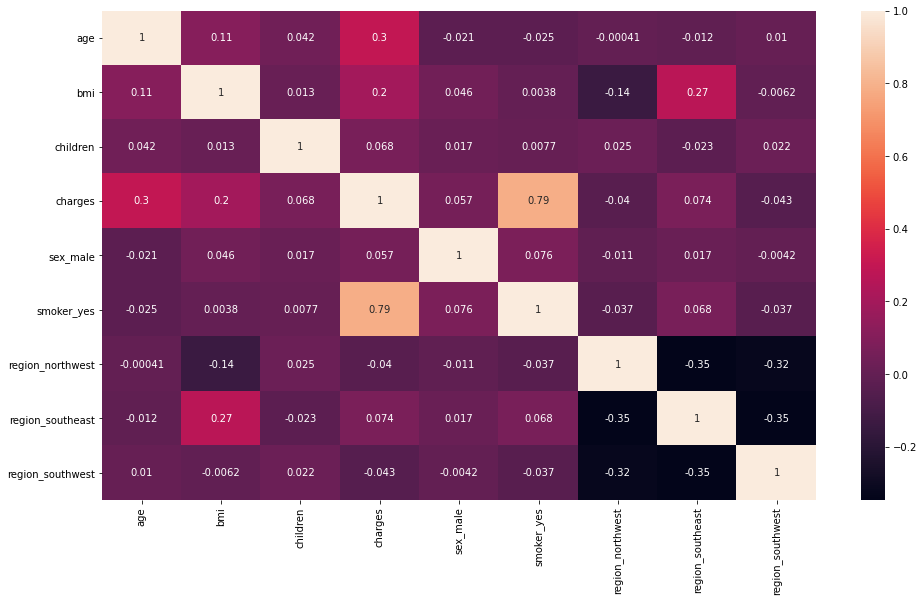

In [431]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [432]:
data_set.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [433]:
x=data_set.drop(columns='charges')

In [434]:
y=data_set['charges']

In [435]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [436]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [437]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [438]:
y_pred=regressor.predict(x_test)

In [439]:
print(y_pred)
print(y_test)

[1.11699271e+04 9.48670909e+03 3.81811231e+04 1.62663133e+04
 6.91464801e+03 3.96348488e+03 1.57939691e+03 1.43852566e+04
 9.01257970e+03 7.50846068e+03 4.49176728e+03 1.02795839e+04
 8.80129751e+03 3.79802013e+03 2.79262010e+04 1.07151158e+04
 1.12889756e+04 6.10501768e+03 8.24104117e+03 2.71445089e+04
 3.36440910e+04 1.43551043e+04 1.17372043e+04 3.21374335e+04
 4.17005913e+03 9.25496051e+03 1.08433751e+03 9.80417085e+03
 3.77104596e+03 1.04318587e+04 9.00931722e+03 4.00749509e+04
 1.56889543e+04 1.38794545e+04 2.47597127e+04 5.16638285e+03
 1.26109277e+04 3.07691018e+04 3.35498325e+04 3.67154946e+03
 3.97568613e+03 3.98729942e+03 3.05285774e+04 3.95053023e+04
 2.78105036e+04 5.09258923e+03 1.06042481e+04 7.82952256e+03
 3.59255553e+03 1.02128745e+04 5.72038147e+03 3.42627499e+03
 3.30210242e+04 3.84738218e+04 1.60534782e+04 7.16491905e+03
 5.73919977e+03 9.45413291e+03 8.91062701e+03 1.17258857e+04
 1.85695629e+03 3.89143605e+04 1.48996730e+04 1.18049582e+04
 1.40504025e+04 1.405614

<Figure size 3.6e+06x2.952e+06 with 0 Axes>

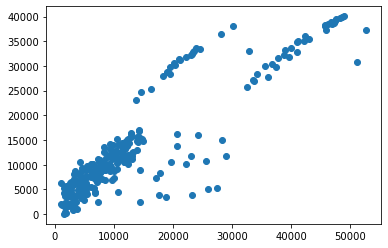

<Figure size 3.6e+06x2.952e+06 with 0 Axes>

In [440]:
plt.scatter(y_test,y_pred)
plt.figure(figsize=(50000,41000))

In [441]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

31827950.22952384

In [442]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7999876970680433

In [444]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
